For this project i selected 'Fitness Tracker' dataset from Kaggle link to the dataset is https://www.kaggle.com/datasets/sumita8/fitness-tracker/data

Project on Exploratory Data Analysis on Fitness Tracker Dataset

1.Dataset Selection and Preliminary Research

This project we will explore the dataset Fitness Tracker from Kaggle and it aims to show the statistical data plus visual representations which help identify patterns and key insights. As i reviewed the Dataset it included various attributes on the columns like:

1. 'ID': A unique identifier for each user

2. 'TotalSteps': The amount of total steps covered in a day

3. 'TotalDistance': the amount of total distance covered(miles)

4. 'Calories': total number of calories burned

5. 'HeartRate': Users heart rate in (beats per minute) recorded during workouts.



**B. Conduct preliminary research to understand the datasets context and potential questions to explore.**

From the above information i decided to explore the questions below?

1. What will be the distribution of the daily steps,and calories burned? (Workout trends)

2. Are steps and calories burned sufficient for determining high-performance "athletic status" versus the "casual user" status?(Detection Status)

3. Does the heart rate show any direct relation to the physical activity level?(Health Risk)

4. Do users show abnormal heart rate patterns during exercise sessions?(Health Risk)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We are going to load the dataset
df = pd.read_csv('fitness_tracker.csv')
df.head() #This is to display the first 5 rows of the dataset



,ID,Workout Duration (mins),Calories Burned,Step Count,Heart Rate
0,FT0001,69,356.178169,11146,73
1,FT0002,79,717.966682,16173,138
2,FT0003,85,229.367368,1232,97
3,FT0004,118,944.678742,13318,130
4,FT0005,56,811.475560,15984,74


In [3]:
## Step 2: Data Cleaning and Preprocessing
##The first step is to handle missing values and normalize data types while removing all outliers from the data set.

In [4]:
print('Missing_values')
print(df.isnull().sum())

df.dropna(inplace=True) #this is where we drop the missing rows if available

# Check for duplicates
print(df.duplicated().sum())

# Removing any duplicates (if any)
df = df.drop_duplicates()

print('data_types') #this is to check for data types


# Remove outliers using z-score (example for 'Calories' column)
from scipy.stats import zscore

df = df[(np.abs(zscore(df['Calories Burned'])) < 3)]

print("\nCleaned Dataset Shape:", df.shape)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print(df.head())



Missing_values
ID                         0
Workout Duration (mins)    0
Calories Burned            0
Step Count                 0
Heart Rate                 0
dtype: int64
0
data_types

Cleaned Dataset Shape: (500, 5)

Missing Values After Cleaning:
ID                         0
Workout Duration (mins)    0
Calories Burned            0
Step Count                 0
Heart Rate                 0
dtype: int64
       ID  Workout Duration (mins)  Calories Burned  Step Count  Heart Rate
0  FT0001                       69       356.178169       11146          73
1  FT0002                       79       717.966682       16173         138
2  FT0003                       85       229.367368        1232          97
3  FT0004                      118       944.678742       13318         130
4  FT0005                       56       811.475560       15984          74


In [5]:
## Step 3 Exploratory Data Analysis


<Figure size 1800x600 with 0 Axes>

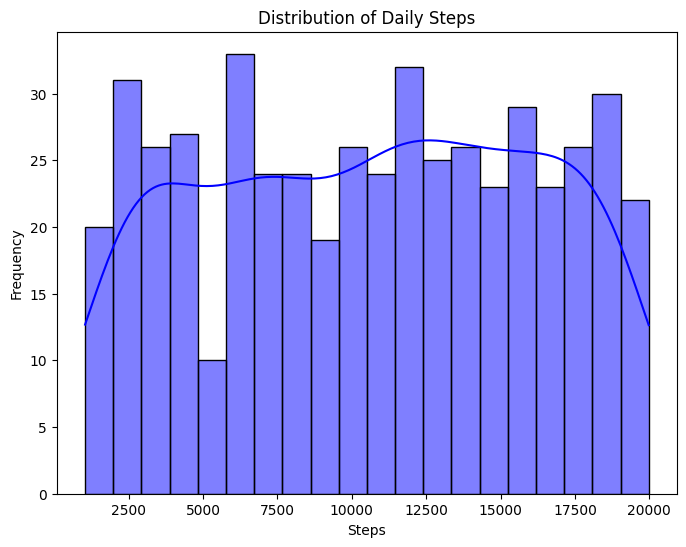

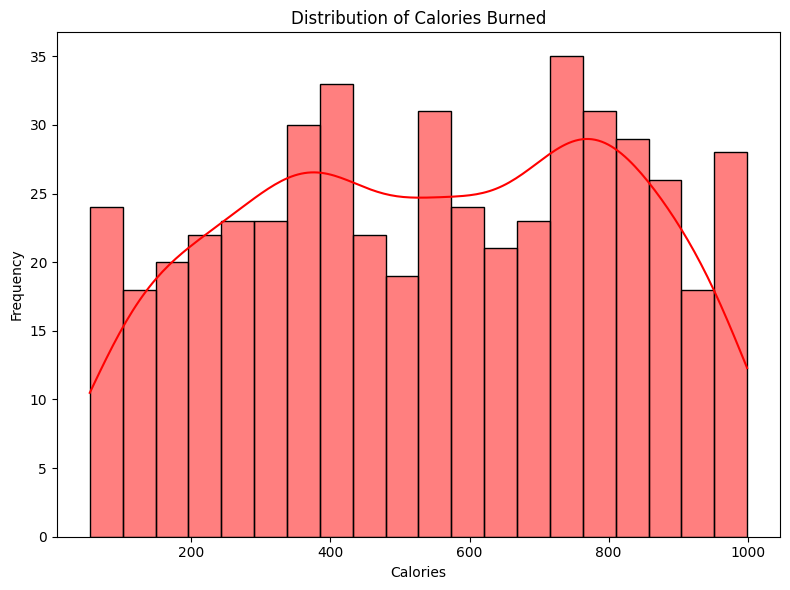

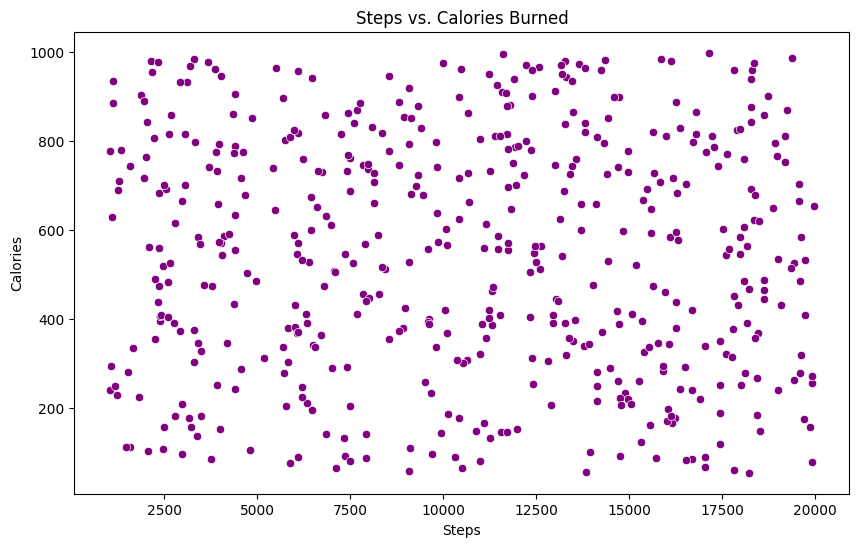

In [6]:
# Distribution of Daily Steps,calories distirbution and relationship between steps and calories
plt.figure(figsize=(18, 6))

# Subplot 1: Steps Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Step Count'], kde=True, bins=20, color='blue')
plt.title('Distribution of Daily Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')


# Subplot 2: Calories Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories Burned'], kde=True, bins=20, color='red')
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Relationship Between Steps and Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Step Count', y='Calories Burned', data=df, color='purple')
plt.title('Steps vs. Calories Burned')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()



In [7]:
## QUESTION 2
##Are steps and calories burned sufficient for determining high-performance "athletic status" versus the "casual user" status?(Detection Status)

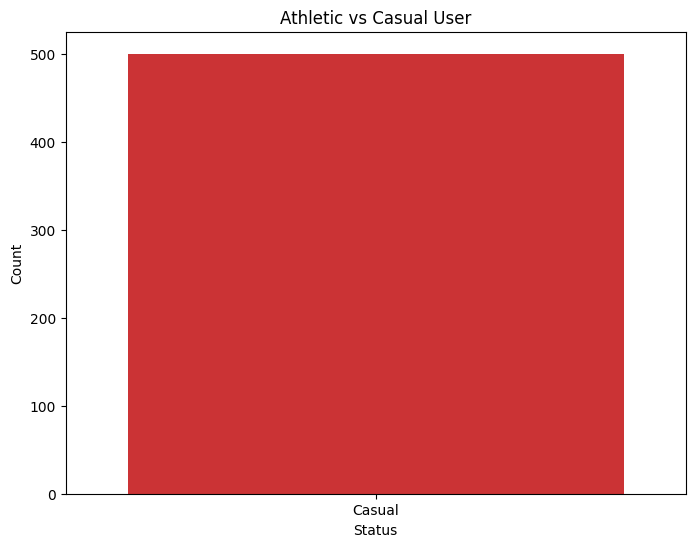

In [8]:
df['AthleticStatus'] = np.where((df['Step Count'] > 10000) & (df['Calories Burned'] > 2000), 'Athletic', 'Casual')

#plot Athletic versus Casual user
plt.figure(figsize=(8,6))
sns.countplot(x='AthleticStatus',hue='AthleticStatus', data=df, palette='Set1',legend=False)
plt.title('Athletic vs Casual User')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [9]:
## Question 3: Health Risk

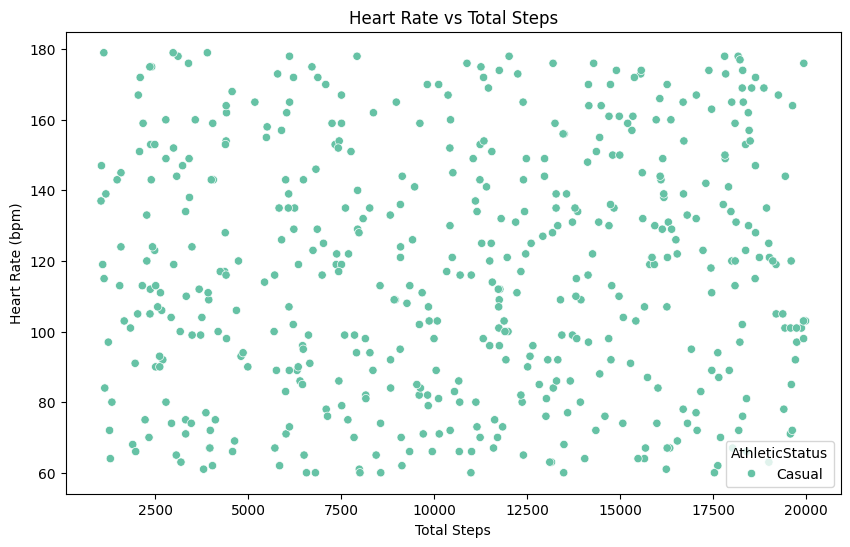

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Step Count', y='Heart Rate', data=df, hue='AthleticStatus', palette='Set2')
plt.title('Heart Rate vs Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Heart Rate (bpm)')
plt.show()

In [11]:
##Question 4 Abnormal Heart Rate Patterns

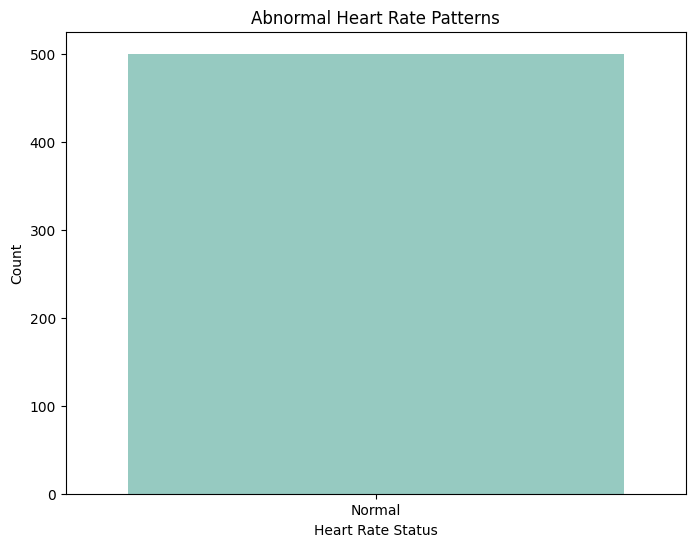

In [12]:
#identify the abnormal heart rate patterns
df['AthleticHeartRate'] = np.where((df['Heart Rate'] > 100) & (df['AthleticStatus'] == 'Athletic'), 'Abnormal', 'Normal')

#we are going toplot the patterns
plt.figure(figsize=(8,6))
sns.countplot(x='AthleticHeartRate',hue='AthleticHeartRate', data=df, palette='Set3',legend=False)
plt.title('Abnormal Heart Rate Patterns')
plt.xlabel('Heart Rate Status')
plt.ylabel('Count')
plt.show()
#

In [13]:
## Statistical Inference
## Formulate one or two hypotheses based on the EDA findings

**Relationship between Total Steps and Calories**

In [14]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Step Count'], df['Calories Burned'])
print(f"Correlation between Total Steps and Calories: {corr:.2f}")
print(f"P-value: {p_value:.4f}")


Correlation between Total Steps and Calories: -0.03
P-value: 0.4429


**Relationship between Heart Rate and Steps**

In [15]:
 from scipy.stats import pearsonr

 corr, p_value = pearsonr(df['Heart Rate'], df['Step Count'])
 print(f"Correlation between Heart Rate and Steps: {corr:.2f}")
 print(f"P-value: {p_value:.4f}")


Correlation between Heart Rate and Steps: 0.06
P-value: 0.1987


**QUESTION 5 Visualization and Presentation of Findings**

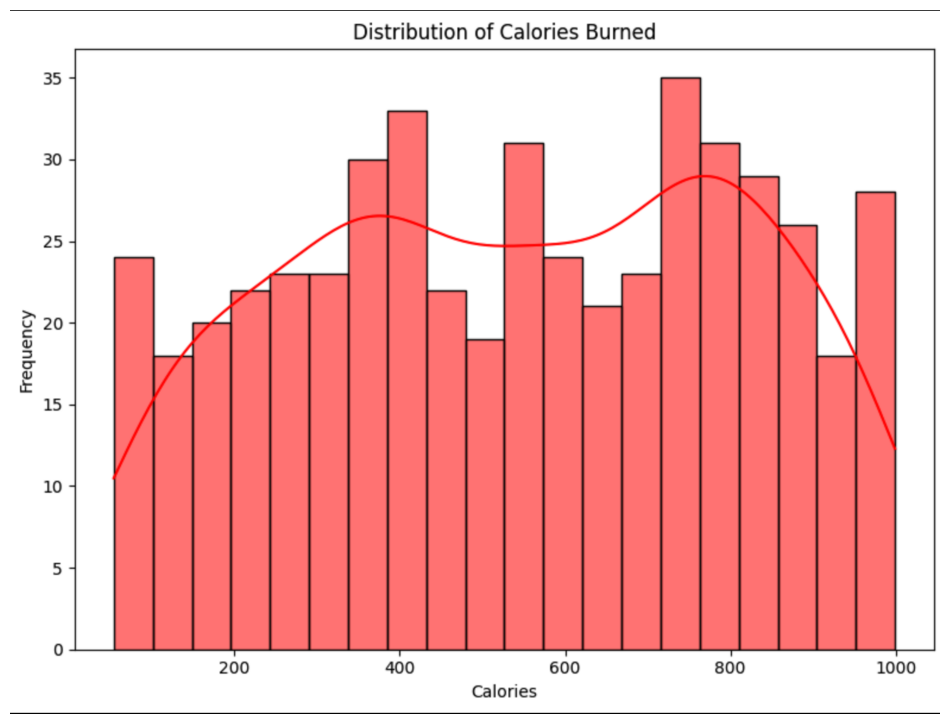

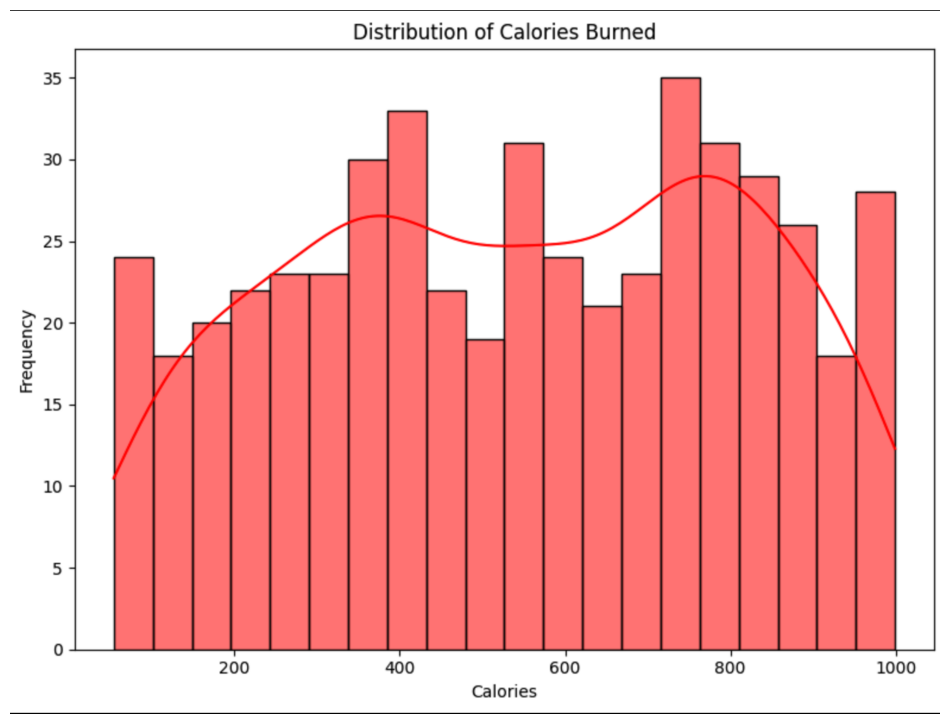

In [30]:
!pip install supervision
import supervision as sv
import cv2
image = cv2.imread("RED.jpeg")
sv.plot_image(image)

if image is None:
  print("Error: Could not load image. Check the filename and path.")
else:
    sv.plot_image(image)

Question 6 and 7

##Report on Fitness Tracker Dataset

**INTRODUCTION**
**Dataset Overview**

This project entails the analysis of the Fitness Tracker Dataset from Kaggle.It contains:
‘ID’ the unique identifier for each user
‘Total Steps’ this is the total number of steps covered in a day
‘Calories’’ the total number of calories burned
‘HeartRate’ The user's heart rate in beats per minute which were recorded during workout.

**Objectives**

A. To explore the workout trends, distribution of steps, distance, and calories burned

B. To Differentiate the steps and calories burned between Athletic user and Casual User

C. Does the heart rate show any direct relation to the physical activity level?(Health Risk)

D. Do users show abnormal heart rate patterns during exercise sessions?(Health Risk)

2. Data Cleaning and Preprocessing

    Steps Taken
**Loading the Dataset**: I loaded the dataset into Pandas Dataframe for analysis
Handled the Missing Values: Rows that had missing values were dropped to ensure the data is clean

**Removed Duplicates**: The duplicated rows were identified and removed to make the code smooth for the analysis.

Removing the outliers using z-score reduced the dataset size from original to the cleaned shape.

3. Exploratory Data Analysis (EDA)

**Distribution of Activity Metrics:**
**Total Steps:** most users took between ( 5000) / day

**‘Calories Burned’:** Majority Burned calories in the range corresponding to the frequency which was (1000)

**‘Relationship between steps and calories’**:Weekly step counts show a positive relationship which leads to increased calories burn across the day. More steps lead to greater energy consumption. Users who walk less than 5,000 steps in a day use less than 400 calories while people who take more than 15,000 steps exposed their bodies to over 800 calories. The correlation shows steps directly impact the total amount of energy spent by a user.

4. **Statistical Inference**
**Hypothesis and Results**

   Hypothesis 1: There is a significant correlation between “total steps” and “calories burned”

**Test:** the Pearson correlation

**Results:** Correlation Coefficient(r): [-.0.03], this indicates a strong positive correlation between the steps and calories burned

       ** P-value:** [0.4429], the p-value is less than 0.05 indicating the correlation is statistically significant

  Hypothesis 2: Athletic users have significantly higher activity levels than casual users

**Test:** pearson correlation coefficient

**Results:** Correlation Coefficient(r): 0.06, this indicates a very weak positive correlation between heart rate and steps

**P-Value:** 0.1987, indicates it is greater than 0.05 showing it is not statistically significant

5. **Conclusion**

6. **Summary**

**Activity Patterns:** The heart rate data revealed that most athletic users maintain normal heart rates, indicating effective management of physical exertion

 Users with abnormal heart rates may benefit from personalized fitness plans or medical evaluations to ensure safe exercise practices

7. **Reflections**

Challenges
**Data Limitations**:

Missing demographic data for ag and gender which limited the depper segmentation of the dataset

**Technical Issues**:
    Handling missing values by dropping rows required careful trade offs

**Future Additional Analysis**

Develop a predictive model to flag users at risk of abnormal heart rates.

**REFERENCES**

Dataset: [Fitness TrackerDataset] (https://www.kaggle.com/datasets/sumita8/fitness-tracker/data)
Tools: Python, Pandas, Seaborn, SciPy ##
